# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Цель научиться определять рыночную стоимость объектов недвижимости. Наша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

**Цели исследования**: 
* Изучить такие параметры как: площаль, цена, число комнат и высота потолков
* Определить когда продажи совершаются быстро, а когда необычно долго?
* Какие факторы больше всего влияют на стоимость квартиры?
* Какие населённые пункты Ленинградской области имеют самую высокию и низкую стоимость жилья?
* Как определить границы центра в Санкт-Петербурге ?
* Сравнение квартир в центре Санкт-Петербурга от остальных, если ли отличия?

**Ход Исследования**: В первую очередь мы ознакомимся с данными файла. Определим тип и размер, определим природу пропусков, если содержатся. Добавим дополнительные данные для дальнейшего исследования. Изучим на графикак параметры для целей исследования. 
Выделим топ-10 населённых пунктов с доступным и дорогим жильём. Узнаем где "заканчивается" центр Санкт-Петербурга и сверим данные с параметрами нашего исследования. 

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вывод:</a></span></li></ul></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span><ul class="toc-item"><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Вывод:</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Вывод:</a></span></li></ul></li><li><span><a href="#Время-продажи-квартиры" data-toc-modified-id="Время-продажи-квартиры-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Время продажи квартиры</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Удаление-редких-и-выбивающих-значений" data-toc-modified-id="Удаление-редких-и-выбивающих-значений-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Удаление редких и выбивающих значений</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Факторы-влияющие-на-стоимость-квартиры:" data-toc-modified-id="Факторы-влияющие-на-стоимость-квартиры:-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Факторы влияющие на стоимость квартиры:</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Самый-дорогой-и-дешёвый-населённый-пункт-за-м²-по-Ленинградской-области" data-toc-modified-id="Самый-дорогой-и-дешёвый-населённый-пункт-за-м²-по-Ленинградской-области-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Самый дорогой и дешёвый населённый пункт за м² по Ленинградской области</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Поиск-области-центра-города-Санкт-Петербург" data-toc-modified-id="Поиск-области-центра-города-Санкт-Петербург-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Поиск области центра города Санкт-Петербург</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-9.1"><span class="toc-item-num">9.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Сравнение-жилья-в-центре-Санкт-Петербурга-от-остальных" data-toc-modified-id="Сравнение-жилья-в-центре-Санкт-Петербурга-от-остальных-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Сравнение жилья в центре Санкт-Петербурга от остальных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-10.1"><span class="toc-item-num">10.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

## Изучение данных из файла

Перед тем как приступить, импортируем нужные нам вдальнейшем библиотеки для работы с данными:

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

Прочитаем файл и ознакомися с первыми десятью строками таблицы:

In [ ]:
data = pd.read_csv('real_estate_data.csv', sep='\t')
data.head(10)

Можно заметить в таблице наличие отсуствующих значений в стобцах. 

Теперь посмотрим данные таблицы:

data.info()


В таблице 23699 строк, в больше половине столбцов присуствуют пустые значения, часть столбцов нужно будет привести к соотвествующим типам (Например `is_apartment` представлен не в булев типе). 

### Вывод

Мы поверхносто ознакомились с предоставленными данными. В больше половине столбцов присуствуют пустые значения. Можно предположить, что пропуски связанны с не полным предоставлением информации пользователями и со сложностями картографических определений для маленьких населённых пунктов.

## Предобработка данных

Посмотрим общие значение пропусков по каждому столбцу и количество дублей:

In [ ]:
data.isna().sum()

In [6]:
print('Количество дубликатов в данных:',data.duplicated().sum())

Количество дубликатов в данных: 0


`ceiling_height` в дальнейшем нам понадобится, поэтому заполним столбцы не нуль значениями. 
Для этого вызовим числовое описание данных:

In [7]:
data['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

Среднеарифметическое значени (`mean`) отличается от среднеквадратичного отколнения (`std`), поэтому для точности заменим пропуски медианой. 

In [8]:
data.loc[data['ceiling_height'].isna(), 'ceiling_height'] = data['ceiling_height'].median()

`floors_total` - всего этажей в доме. Логически можно предположить, что как минимум из одного этажа дом состоит, но если комната куплена выше первого этажа, тогда для большей точности заменим пустые значения этажом проданной комнаты. Также приведём столб к типу `int`( дробными значениями этажи не могут быть).

In [9]:
data.loc[data['floors_total'].isna().astype(int), 'floors_total'] = data['floor']

Аналогична мы можем поступить со столбцом `balcony` - балкон. Если присуствуют пустые значения, можно предположить что балкон в таких домах отсуствуют, заменим значения нулями. Также приведём к типу `int`, т.к балконов бывают только целое количество:

In [10]:
data['balcony'] = (
    data['balcony']
    .fillna(0)
    .astype(int)
)

`living_area` и `kitchen_area` являются важными данными которые мы в дальнейшем используем. Для заполнения их пустых значений, мы используем группировку по населённым пунктам. Для этого мы в начале заполним пустые `locality_name` значением `unknown`.

In [11]:
data['locality_name'] = data['locality_name'].fillna('unknown')

from nltk.stem import SnowballStemmer
russian_stemmer = SnowballStemmer('russia')

Также проведём фильтрацию для схожих названий для населённых пунктов, чтобы исключить неявные дубли в наших данных:

In [12]:
print('Количество уникальных названий:',len(data['locality_name'].unique()))

for name in ['поселок', 'деревня','посёлок','село','городского']:
         data['locality_name'] = data['locality_name'].str.replace(name,'')
print('Количество уникальных названий после исправления:',len(data['locality_name'].unique()))

Количество уникальных названий: 365
Количество уникальных названий после исправления: 326


Затем создаём цикл, где по каждому населённому пункту, отдельно будет считаться медиана, которой и будем заполнять пустые значения.

In [13]:
for location in data['locality_name'].unique():
    median_living = data.loc[data['locality_name'] == location, 'living_area'].median()
    median_kitchen = data.loc[data['locality_name'] == location, 'kitchen_area'].median()
    
    data.loc[(data['living_area'].isna()) & (data['locality_name'] == location), 'living_area'] = median_living
    data.loc[(data['kitchen_area'].isna()) & (data['locality_name'] == location), 'kitchen_area'] = median_kitchen
#посмотрим сколько пустых значений после операции осталось    
print('Количество пропусков для living_area:', data['living_area'].isna().sum())
print('Количество пропусков для kitchen_area:',data['kitchen_area'].isna().sum())

Количество пропусков для living_area: 17
Количество пропусков для kitchen_area: 19


Оставшиеся не заполненые значение стобцов, мы заменим медианой по всему столбцу.

In [14]:
data.loc[data['living_area'].isna(), 'living_area'] = data['living_area'].median()
data.loc[data['kitchen_area'].isna(), 'kitchen_area'] = data['kitchen_area'].median()

`airports_nearest`, `cityCenters_nearest`, `parks_around3000`, `parks_nearest`, `ponds_around3000`, `ponds_nearest` для данных столбцов возможно отсуствие значение из-за проблематичности картографических определений. Группировка по населённым пунктам нам не сильно поможет, поэтому мы задействуем для заполнения пустых значений общую медиану по каждому столбцу.

In [15]:
data.loc[data['airports_nearest'].isna(), 'airports_nearest'] = data['airports_nearest'].median()
data.loc[data['cityCenters_nearest'].isna(), 'cityCenters_nearest'] = data['cityCenters_nearest'].median()
data.loc[data['parks_around3000'].isna(), 'parks_around3000'] = data['parks_around3000'].median()
data.loc[data['parks_nearest'].isna(), 'parks_nearest'] = data['parks_nearest'].median()
data.loc[data['ponds_around3000'].isna(), 'ponds_around3000'] = data['ponds_around3000'].median()
data.loc[data['ponds_nearest'].isna(), 'ponds_nearest'] = data['ponds_nearest'].median()

Для `days_exposition` также не подойдёт группировка по населённым пунктам, поэтому посмотрим какими значениями удобнее всего заполнить пустоты:

In [16]:
data['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

Более точным решением будет взять медиану и использовать её для заполнения пропусков.

In [17]:
data.loc[data['days_exposition'].isna(), 'days_exposition'] = data['days_exposition'].median()

`is_apartment` нужно превести к типу `bool` (т.к в документации прописан данный тип для этого столбца) 

In [18]:
data['is_apartment'] = data['is_apartment'].astype(bool)

Для дальнейшей работы с `first_day_exposition` нам стоит превести к типу DateTime.

In [19]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'],format = '%Y-%m-%dT%H:%M:%S')

Если конвектировать тип данных для `total_area` с float64 на float32, уменьшется нагрузка на память что скажется на быстродействии программы:

In [20]:
data['total_area'] = pd.to_numeric(data['total_area'],downcast='float')

Проверим результат проделанной работы: 

In [ ]:
data.info()

### Вывод:

Мы проработали данные, заполнили пропуски подходящими значениями. Дубликатов нет, но есть неявные в названиях населённых пунктов. Подобрали к данным нужный тип. В дальнейшем нам это поможет в работе с данными.

## Расчёты и добавление результатов в таблицу

Посчитайте и добавьте в таблицу:
* цену квадратного метра;
* день недели, месяц и год публикации объявления;
* этаж квартиры; варианты — первый, последний, другой;
* соотношение жилой и общей площади, а также отношение площади кухни к общей.

Посчитаем и добавим в нашу таблицу цену квадратного метра, как отношение цены перед снятием публикации к общий площади квартиры. С округлением: 2 цифры после запятой.

In [22]:
data['price_for_square_meter'] = (data['last_price'] / data['total_area']).round(2)

Добавим к таблице для удобства день недели, месяц и год публикации объявления из данных `first_day_exposition`. 

In [23]:
data['weekday'] = data['first_day_exposition'].dt.weekday
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year

Категоризируем этажи в зависимости от расположения в доме: первый, последний и другие (если не попадают в первую или вторую группу) . Для этого создадим функцию `apart_floor`.

In [24]:
def apart_floor(row):
    if row['floor'] == 1:
        return 'Первый'
    if row['floors_total'] == row['floor']:
        return 'Последний'
    else:
        return 'Другой'

Применяем к нашей таблице: 

In [25]:
data['apartment_floor'] = data.apply(apart_floor, axis=1)

Посчитаем для нашей таблицы отношение жилой площади к общей, и также кухонной площади к общей:

In [26]:
data['living_%_total'] = (data['living_area'] / data['total_area'])
data['kitchen_%_total'] = (data['kitchen_area'] / data['total_area'])

Посмотрим на новые добавленные значения в нашей таблице:

In [ ]:
data.head(10)

### Вывод: 

Данные успешно добавленны в таблицу, теперь с их помощью можно приступить к дальнейшему анализу.

## Исследовательский анализ данных

Приступим к изучению следующих параметров:
* Площадь - `total_area`
* Цена - `last_price`
* Число комнат - `rooms`
* Высота потолков - `ceiling_height`

Построим гистаграмму для площади:

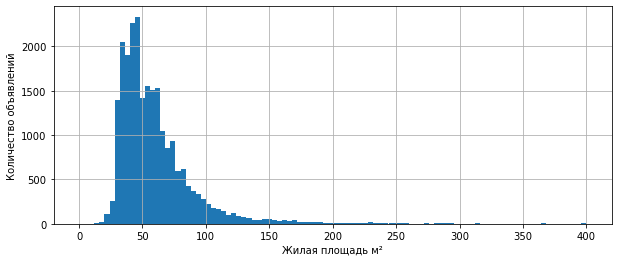

In [28]:
data['total_area'].plot(kind='hist',bins=100,range=(0,400), figsize=(10,4),grid=True)
plt.xlabel('Жилая площадь м²')
plt.ylabel('Количество объявлений')
plt.show()

Можно обратить внимание что значение начинается не с 0. Самый высокий пик можно наблюдать в районе ~ 45м². После пика идёт  неровный спуск, что говорит нам что с ростом площади периодически появляются несколько схожих по размерам вариантов. И только после 150 м² количество похожих вариантов снижается.

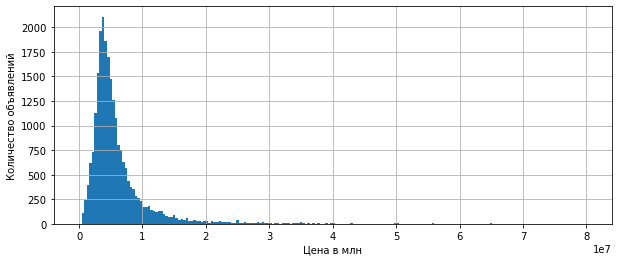

In [29]:
data['last_price'].plot(kind='hist',bins=200,range=(0,0.8*10**8),figsize=(10,4),grid=True)
plt.xlabel('Цена в млн')
plt.ylabel('Количество объявлений')
plt.show()

График имеет приближенный вид к нормальному распределению. Пик достигается на величине 4500000, а с ростом цены количество вариантов плавно уменьшается и практически пропадает на шкале 4 .

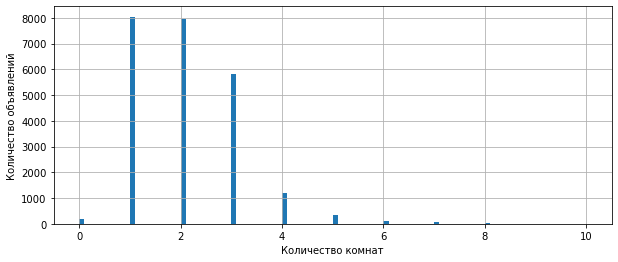

In [30]:
data['rooms'].plot(kind='hist',bins=100,range=(0,10),figsize=(10,4),grid=True)
plt.xlabel('Количество комнат')
plt.ylabel('Количество объявлений')
plt.show()

Данный график отдаленно напоминает гистаграмму и больше походит на столбчатую диаграмму. Два высоких пика соотвествуют одно- и двухкомнатной квартире как самых распространненых вариантов жилплощи. Чуть ниже видим пик для трёхкомнатной, который встречается чуть реже. Также стоит обратить внимание на значение у 0, что говорит нам о наличие ошибочных значений в данных.

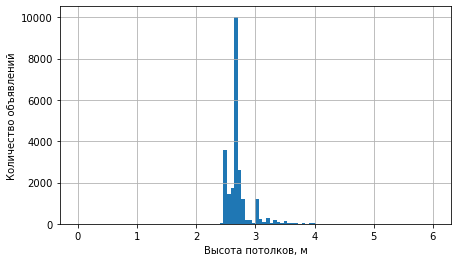

In [31]:
data['ceiling_height'].plot(kind='hist',bins=100,range=(0,6),figsize=(7,4),grid=True)
plt.xlabel('Высота потолков, м')
plt.ylabel('Количество объявлений')
plt.show()

Начало графиков идёт после 2 и доходит до 4 метров. Высота пика 2.65м связано с нашей заменой пустых значений, на медиану, что повлияла на столь большую разницу.

### Вывод:

Приближенный к нормальному распределению оказался график построенный на основе цены жилья. Это нам говорит о том, что цена меньше всего подвержена случайным фактором. Самым распространнёными можно назвать дома с высотой потолка 2.65м и количеством комнат одна или две.

## Время продажи квартиры

Посмотрим для начала на гистраграмму для колонки `days_exposition`:

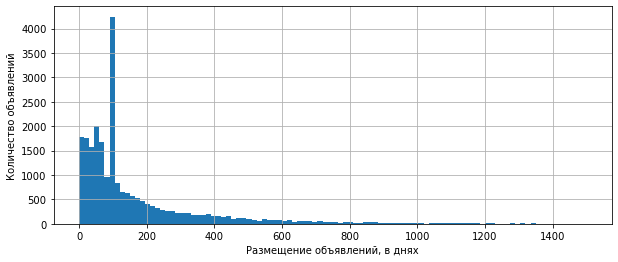

In [32]:
data['days_exposition'].plot(kind='hist',bins=100,range=(0,1500),figsize=(10,4),grid=True)
plt.xlabel('Размещение объявлений, в днях')
plt.ylabel('Количество объявлений')
plt.show()

Основная часть продаж квартиры приходится на первые 100 дней. Высокий пик на гистограмме со значением 95 связан с нашей заменой пустых значений медианой. Количество продаж начианает пропадать после 600 дней.

Посмотрим также на диаграмму размаха и узнаем  какие значения отклонились на среднего и насколько.

<AxesSubplot:>

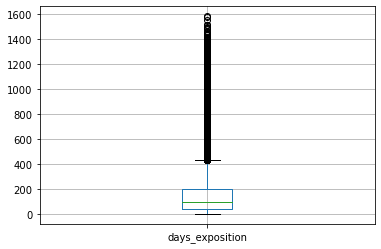

In [33]:
data['days_exposition'].plot.box(grid=True)

Большая часть выбросов находится чуть выше 400, для большой точности мы можем вызвать числовое описание данных:

In [34]:
data['days_exposition'].describe()

count    23699.000000
mean       169.360226
std        206.535633
min          1.000000
25%         45.000000
50%         95.000000
75%        199.000000
max       1580.000000
Name: days_exposition, dtype: float64

Мы знаем что среднее значение равно 169.36, медиана 95, а для определения верхнего предела используем функцию, которая в [будущем нам поможет](#future) быстро определять предел: <a id='def'></a>

In [35]:
def iqr_search(row):
    q1 = data[row].quantile(0.25)
    q3 = data[row].quantile(0.75)
    iqr = q3 - q1
    return ('Нижний предел:', (q1 - 1.5 * iqr).round(2),
            'Верхний предел:', (q3 + 1.5 * iqr).round(2)
           )

In [36]:
iqr_search('days_exposition')

('Нижний предел:', -186.0, 'Верхний предел:', 430.0)

### Вывод

Благодаря графику и числовому описанию данных мы нашли медиану, средне-арифметическое, а также нашли верхний предел равный 430 дней. Будем считать что продажи больше 14 месяцев сильно затянулись, а те счастливчики что откликнулись в первый же день на объявление, совершили свою покупку быстро.

## Удаление редких и выбивающих значений

Для того чтобы исключить редкие и выбивающие значения, рассмотрим столбцы:
* `rooms`
* `total_area`
* `ceiling_height`
* `price_for_square_meter` 

Посмотрим диаграмму размаха для количество комнат:

<AxesSubplot:>

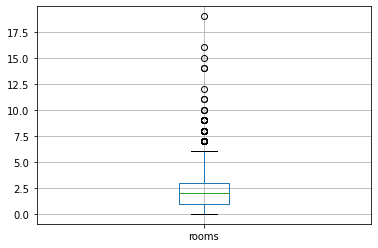

In [37]:
data['rooms'].plot.box(grid=True)

Примим минимальное значение комнат равных 1, а за максимальное число возьмём 6, остальные значения будем считать выбросами.

Посмотрим на общую площадь:

<AxesSubplot:>

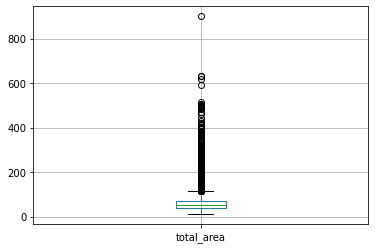

In [38]:
data['total_area'].plot.box(grid=True)

Для большой точности вызовем числовое описание значение: 

In [39]:
data['total_area'].describe()

count    23699.000000
mean        60.348774
std         35.654266
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900002
max        900.000000
Name: total_area, dtype: float64

Верхнюю границу мы можем посчитать нашей [созданой функцией](#def): 
<a id='future'></a>

In [40]:
iqr_search('total_area')

('Нижний предел:', -4.85, 'Верхний предел:', 114.75)

Все те кто могут позволить себе жильё больше 114.75 квадртаных метра, дальше не будут включены.

Посмотрим диаграмму размаха для высоты потолков:

(0.0, 10.0)

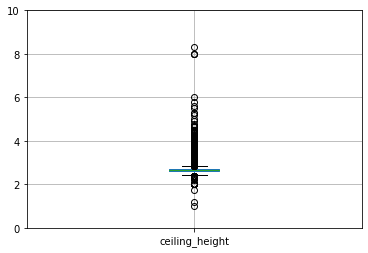

In [41]:
data['ceiling_height'].plot.box(grid=True)
plt.ylim(0,10)

Значения визуально сложно определить, обратимся к числовым определениям: 

In [42]:
data['ceiling_height'].describe()

count    23699.000000
mean         2.724358
std          0.988298
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

In [43]:
iqr_search('ceiling_height')

('Нижний предел:', 2.45, 'Верхний предел:', 2.85)

Наши пределы выглядит вполне адекватно, если посмотреть на min то можно заметить, что есть дома высотой не больше метра, что благо не попадает в наши пределы.

Рассмотрим размах для стоимости за квадратный метр:

(0.0, 1000000.0)

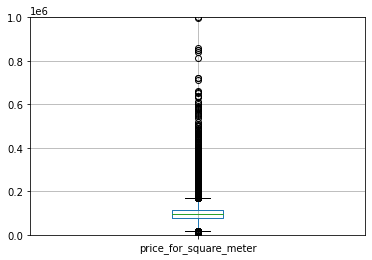

In [44]:
data['price_for_square_meter'].plot.box(grid=True)
plt.ylim(0,10**6)

Снова обратимся к числовому определению:

In [45]:
data['price_for_square_meter'].describe()

count    2.369900e+04
mean     9.942166e+04
std      5.030680e+04
min      1.118300e+02
25%      7.658547e+04
50%      9.500000e+04
75%      1.142563e+05
max      1.907500e+06
Name: price_for_square_meter, dtype: float64

In [46]:
iqr_search('price_for_square_meter')

('Нижний предел:', 20079.19, 'Верхний предел:', 170762.61)

Цена 170762 выглядит не маленькой, но судя по максимуму, ещё приемлимой для покупки.

Объеденим наши срезы для фильтрации таблица данных и посмотрим на первые 10 строчек:

In [47]:
filter_data = data.query(
    '1 <= rooms <=6 and 114.75 >= total_area and 2.45 <= ceiling_height <=2.85 and 20079 <=price_for_square_meter <= 170763')
filter_data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_for_square_meter,weekday,month,year,apartment_floor,living_%_total,kitchen_%_total
0,20,13000000.0,108.000000,2019-03-07,3,2.70,8,51.00,8,True,...,2.0,755.0,95.0,120370.37,3,3,2019,Последний,0.472222,0.231481
1,7,3350000.0,40.400002,2018-12-04,1,2.65,1,18.60,1,True,...,0.0,502.0,81.0,82920.79,1,12,2018,Первый,0.460396,0.272277
2,10,5196000.0,56.000000,2015-08-20,2,2.65,5,34.30,4,True,...,2.0,574.0,558.0,92785.71,3,8,2015,Другой,0.612500,0.148214
5,10,2890000.0,30.400000,2018-09-10,1,2.65,12,14.40,5,True,...,1.0,502.0,55.0,95065.79,0,9,2018,Другой,0.473684,0.299342
6,6,3700000.0,37.299999,2017-11-02,1,2.65,26,10.60,6,True,...,0.0,502.0,155.0,99195.71,3,11,2017,Другой,0.284182,0.386059
7,5,7915000.0,71.599998,2019-04-18,2,2.65,24,31.30,22,True,...,0.0,502.0,95.0,110544.70,3,4,2019,Другой,0.437151,0.263966
8,20,2900000.0,33.160000,2018-05-23,1,2.65,27,15.43,26,True,...,1.0,502.0,189.0,87454.77,2,5,2018,Другой,0.465320,0.265682
9,18,5400000.0,61.000000,2017-02-26,3,2.50,9,43.60,7,True,...,0.0,502.0,289.0,88524.59,6,2,2017,Другой,0.714754,0.106557
10,5,5050000.0,39.599998,2017-11-16,1,2.67,12,20.30,3,True,...,2.0,553.0,137.0,127525.26,3,11,2017,Другой,0.512626,0.214646
11,9,3300000.0,44.000000,2018-08-27,2,2.65,5,31.00,4,False,...,0.0,502.0,7.0,75000.00,0,8,2018,Другой,0.704545,0.136364


### Вывод

Проанализировав диаграммы размаха мы отфильтровали наши данные от выбросов, а именно количество комнат от 1 до 6, площадью до 114.75, высотой потолков до 2.85м и ценой 170763 за квадратный метр.

## Факторы влияющие на стоимость квартиры:

Рассмотрим зависимости цены от :
* площади
* числа комнат
* удалённости от центра 
* этажа квартиры
* даты размещения ( неделя, месяц, год)

Для большего понимания взаимодействия мы будем рассматривать графики рассеивания отношений цена/.., подкрепляя числовыми значениями корреляции. 

Начнём с отношения цены и площади:

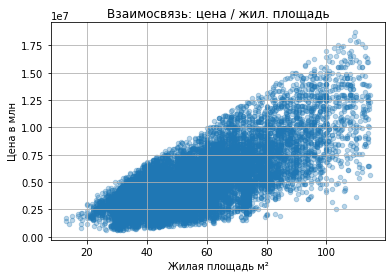

In [48]:
filter_data.plot(kind='scatter',
                x='total_area',
                y='last_price',
                grid=True,
                alpha = 0.3,
                title = 'Взаимосвязь: цена / жил. площадь')
plt.xlabel('Жилая площадь м²')
plt.ylabel('Цена в млн')
plt.show()

В целом можно увидеть прямо-пропорциональную зависимость цены и площади, что вполне логично. Так как в нашей выборке участвуют разные города, то один размер жилплощади в разных городах может отличаться. Посмотрим корреляцию для этих параметров:

In [49]:
print('Взаимосвязь цена/площадь :', (filter_data['total_area'].corr(filter_data['last_price']).round(2)))

Взаимосвязь цена/площадь : 0.74


Коэффициент близок к 1, что говорит нам о прямо-прапорциональной зависимости двух величин.

Посмотрим теперь взаимосвязь цены/количество комнат:

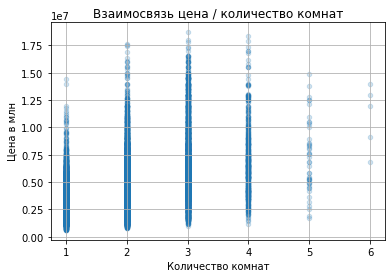

In [50]:
filter_data.plot(kind='scatter',
                x='rooms',
                y='last_price',
                 grid=True,
                alpha = 0.2,
                title = 'Взаимосвязь цена / количество комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Цена в млн')
plt.show()

На графике видно что с увеличением цен, уменьшается кол-во предложений на однокомнатные квартиры. Для трёх, четырёх и пяти комнатных квартир предложение цены стартует с отличной цены от одной и двух комнатной квартиры, что в целом логично. 

Посмотрим на корреляцию:

In [51]:
print('Взаимосвязь цена/количество комнат :', (filter_data['rooms'].corr(filter_data['last_price']).round(2)))

Взаимосвязь цена/количество комнат : 0.45


Коэффициент имеет положительное значение, что говорит о прямо-прапорциональной связи, но в тоже время находится ближе к 0, что говорит нам о возможном отсуствии связи для двух параметров. Вероятно всего на это повлияло состав нашей выборки.

Рассмотрим теперь взаимосвязь цены и расстояние от центра:

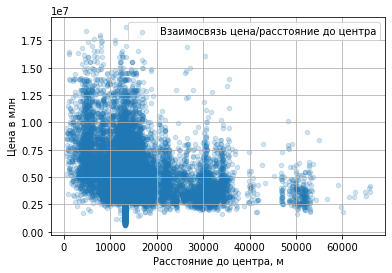

In [52]:
filter_data.plot(kind='scatter',
                x='cityCenters_nearest',
                y='last_price',
                 grid=True,
                alpha = 0.2,
                label = 'Взаимосвязь цена/расстояние до центра')
plt.xlabel('Расстояние до центра, м')
plt.ylabel('Цена в млн')
plt.show()

График получился сложночитаемым, возможно на это повлияла большое отсуствие значений с последующей заменой на глобальную медиану. В целом видно обратно-прапорциональная связь, но для большой точности посмотрим на корреляцию:

In [53]:
print('Взаимосвязь цена/расстояние до центра :', (filter_data['cityCenters_nearest'].corr(filter_data['last_price']).round(2)))

Взаимосвязь цена/расстояние до центра : -0.19


Как было вышесказано: знак минус соотвествует обратно-прапорциональной связи, но значение близко к 0, что говорит о сложной взаимосвязи двух параметров. Рассматривать данную взаимосвязь проблематично для нашей выборки.

Посмотрим взаимосвязь цены/этаж квартиры. Этаж квартиры представлен тремя группами: первый, последний и другой ( между первым и последним). Для большего удобства посмотрим диаграмму размаха:

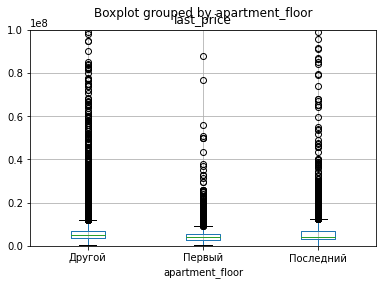

In [70]:
data.boxplot(column = 'last_price', by = 'apartment_floor')
plt.ylim(0,10**8)
plt.show()

Как можно увидеть все три группы находятся на примерно равных значениях, что будем интерпретировать как отсуствии взаимосвязи между выбором этажа. 

Теперь посмотрим связь цены от даты размещения: 

([], [])

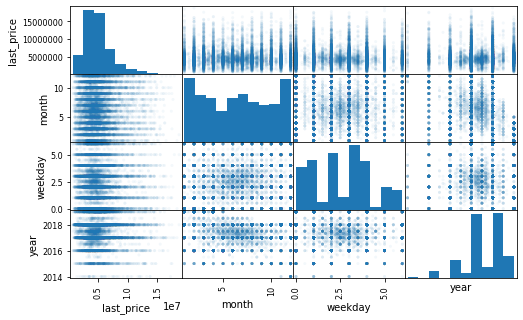

In [55]:
(
    pd.plotting.scatter_matrix
    (
    filter_data.pivot_table(index='price_for_square_meter',values=['last_price','weekday','month','year']),
        figsize=(8,5),
        alpha=0.05
    )
)
plt.xticks([])
plt.yticks([])

Мы можем увидеть по матрице, что цена не зависит от дня недели и месяц. Для взаимосвязи год/цена видим яркие пики для 2017 и 2018 года, что говорит нам о высокой востребовательности в это время, что повлияла на увеличение цены. Также не касаясь вопроса взаимосвязи, можно увидеть что больше всего предложений происходит с мая по сентябрь, со вторника по четверг.

### Вывод

Мы убедились, что цена взаимосвязана от жилой площади в независмости от расположения населённого пункта. Также не в полной мере доказана и влияение количество комнат, но с увереностью можно сказать что квартира с больше чем одна комната выйдёт дороже. Для расстояние до центра связь не подтвердилась, возможно повлиял состав нашей выборки. Также не подвердилась взаимосвязь от дня недели, месяца или на каком этаже находится квартира.

## Самый дорогой и дешёвый населённый пункт за м² по Ленинградской области

Выберим 10 населённых пунктов с наибольшим числом объявлений:

In [56]:
top_10 = filter_data['locality_name'].value_counts().head(10).index.values
print(top_10)

['Санкт-Петербург' ' Мурино' ' Шушары' 'Всеволожск' ' Парголово' 'Колпино'
 'Пушкин' 'Гатчина' ' Кудрово' 'Выборг']


Теперь отфильтруем наши данным по нашему "топу" и посмотрим на среднюю величину квадратного метра в порядке убывания:

In [57]:
(
    filter_data[filter_data['locality_name'].isin(top_10)]
    .groupby('locality_name').agg({'price_for_square_meter' : 'mean'})
    .sort_values(by='price_for_square_meter', ascending=False)
)

,price_for_square_meter
locality_name,
Санкт-Петербург,104821.348059
Пушкин,101004.793734
Кудрово,92311.922786
Парголово,90448.423727
Мурино,85046.875698
Шушары,78400.766581
Колпино,75564.528987
Гатчина,68999.202872
Всеволожск,67032.108880


### Вывод

Наиболее дорогая недвижимость находится в "северной" столице Росссии. На небольшую величину проигрывает туристический город Пушкин, чем обусловленна столь высокая цена. Самая недорогая недвижимость находится в Выборге, находящийся в северной части области.

## Поиск области центра города Санкт-Петербург

Выделим только те данные которые относятся к Санкт-Петербургу:

In [58]:
spb = filter_data.query('locality_name == "Санкт-Петербург"')

Затем на потребуется перевести для удобства расстояние до центра в км, желательно в целочисленном ввиде:

In [ ]:
spb['center_km'] = (spb['cityCenters_nearest'] / 1000).astype(int)

Остаётся составить график зависимости цены (возьмём цену за квадратный метр) от удалённости от центра:

<AxesSubplot:xlabel='center_km'>

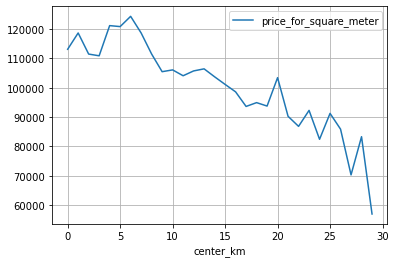

In [60]:
(
    spb
    .pivot_table(index='center_km', values='price_for_square_meter')
    .plot(grid=True)
)

Мы можем наблюдать небольшое падание и затем рост в районе 6 км, затем резкий спад. Возможно квартиры что находятся за шестым км уже не рассматриваются покупателями как центр города. Второй пик на 20 км возможно демонстрирует вторую черту города. 


### Вывод 

С помощью графиков мы нашли гипотетическую цену за квадратный метр для квартир в центре Санкт-Петербурга. Также на графике есть пару крутых пиков, которые можно воспринимать как черты города.

## Сравнение жилья в центре Санкт-Петербурга от остальных

Параметрами сравнения будут наши знакомые: 
* площадь
* цена
* число комнат
* высота потолков

Также мы отфильтруем данные,чтобы в них попадали только квартиры в центре Петербурга.

In [61]:
spb_center =spb.query('center_km < 6')

Посмотрим на полученные гистограммы по нашим параметрам:

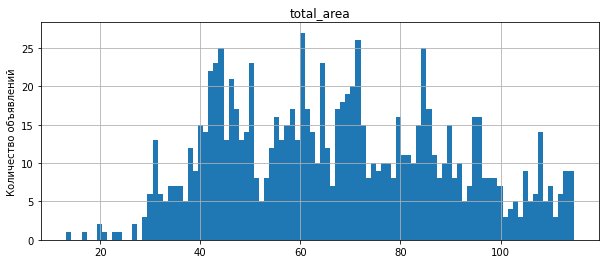

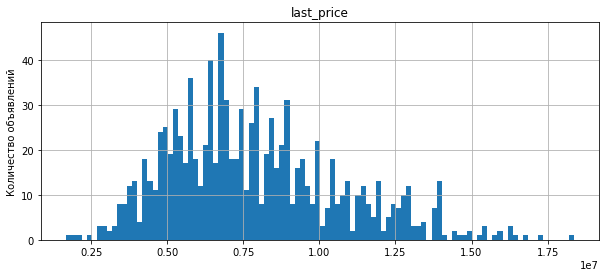

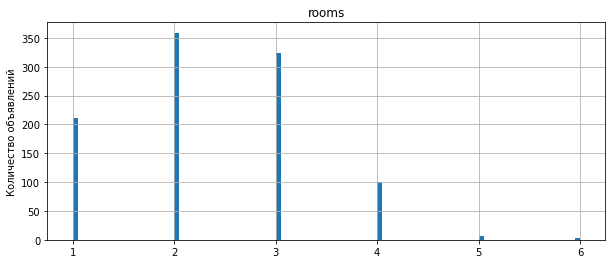

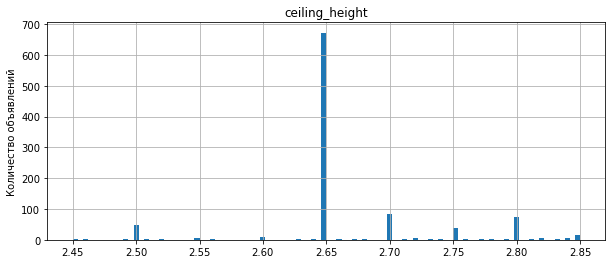

In [62]:
for column in ['total_area','last_price','rooms','ceiling_height']:
    spb_center[column].plot(kind='hist',bins=100,figsize=(10,4),grid=True,title=column)
    plt.ylabel('Количество объявлений')
    plt.show()

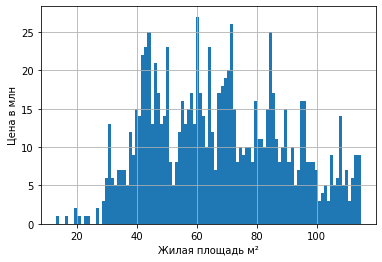

In [63]:
spb_center['total_area'].plot(kind='hist',bins=100,grid=True)
plt.xlabel('Жилая площадь м²')
plt.ylabel('Цена в млн')
plt.show()

Самой распространненой площадью в центре являются квартиры 60, 72 и 85 квадратных метров. Цена при этом самая высокая является: 6500000 и 6700000. В центре очень много двухкомнатных и трёхкомнатных квартир. А самый распространнёная высота потолков является 2.65 метра.

Рассмотрим также факторы влияющие на цену: 
* число комнат
* этаж
* удалённость от центра
* дата размещения объявления

Рассмотри графики рассеивания: 

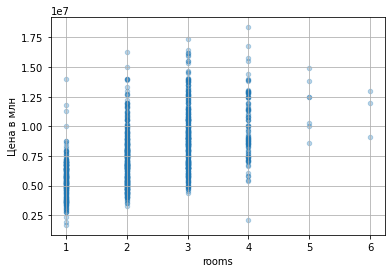

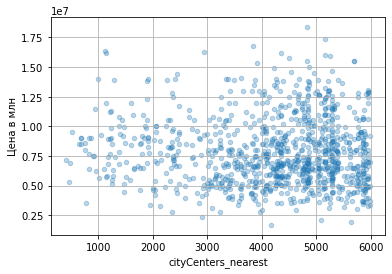

In [64]:
for column in ['rooms','cityCenters_nearest']:
    spb_center.plot(kind='scatter',
                x=column,
                y='last_price',
                alpha = 0.3,
                grid=True
    )
    plt.ylabel('Цена в млн')
    plt.show()

С увеличением количество комнат цена растёт, но уменьшается на четырёхкомнатных квартирах, возможно это связана количество таких квартир в нашей выборке. При отдалении от центра количество предложений больше, но при этом сложно определить насколько взаимосвязана цена с отдаленостью ( хотя в теории должна уменьшаться). 

Посмотрим диаграмму размаха для этажа:

<AxesSubplot:title={'center':'last_price'}, xlabel='apartment_floor'>

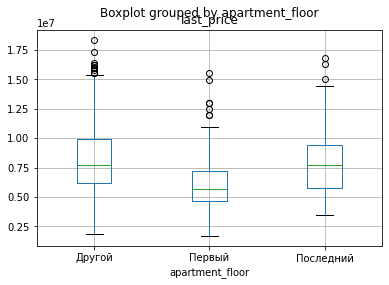

In [65]:
spb_center.boxplot(column = 'last_price', by = 'apartment_floor')

По графике можно увидеть, что зачастую люди в центре выбирают квартиры выше первого этажа.

([], [])

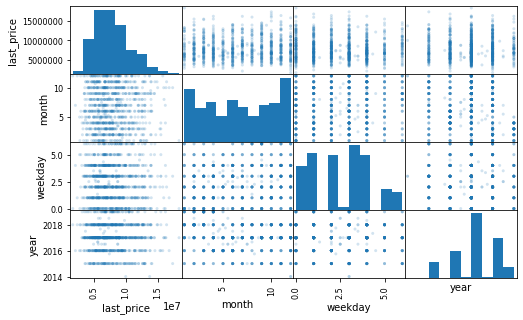

In [66]:
(
    pd.plotting.scatter_matrix
    (
    spb_center.pivot_table(index='price_for_square_meter',values=['last_price','weekday','month','year']),
        figsize=(8,5),
        alpha=0.2
    )
)
plt.xticks([])
plt.yticks([])

Из матрицы мы можем увидеть, что цена зависит от дня недели, чаще происходят покупки в будни дни. Нет ярко выраженной зависимости от месяца. Большая цена соотвествует 2018 и 2019 году, также можно заметить что чаще покупали именно в этих годах.

### Вывод 
Сравнив параметры для центра Санкт-Петербурга и остального жилья мы можем сказать: в центре предпочитают жильё большей площади (60 и 45), больше распространнены двух и трёхкомнатные квартиры, но и цены при этом тоже выше(на 2 миллиона). Намного реже распространнены потокли не 2.65м. 
На цены в центре как и везде влияет количество комнат, но не так выражена для отдалённости от центра ( возможно играет роль что первые км центра не жилая площадь). Люди в цетре зачастую предпочитают комнаты выше первого этажа, что сказывается на цене. Также дома что выставленны "недавно" с 2017ого и 2018ого пользуются больше популярностью и имеют выше цену, и покупаются чаще в будний день. По сравнению с общей выборкой зависимость от месяца невыявленна. 

## Общий вывод

Изучив и отфильтровав данные от пустот и выбросов, построив графики мы можем установить основные параметры для определения рыночной стоимости объектов: размер площади, количество комнат, расстояние от центра, как давно сделано предложение. Опираясь на эти параметры, мы можем находить выбивающие из общего числа выбросы, предугадывать спрос на недвижимость. 

Также стоит обратить внимание на картографическое определение для малых населённых пунктов. Зачастую из-за проблематичности определения, данные на выходе имеют пустые значения, требующие дополнительной обработки.